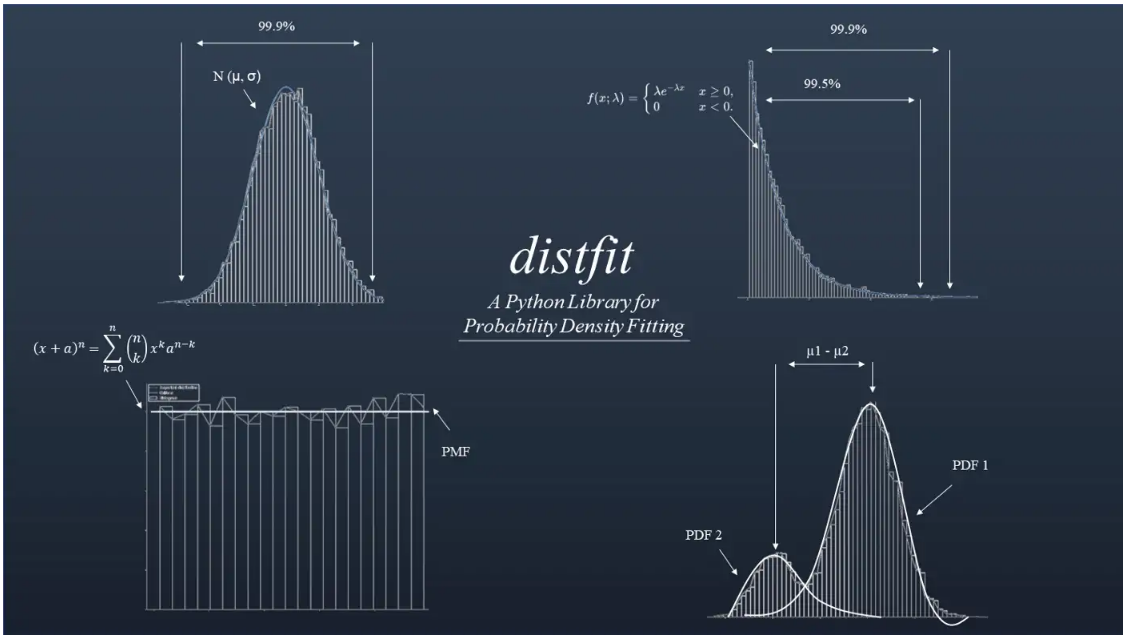

### How to determine the best fit using a quantitative approach and how to confirm it using visual inspections.

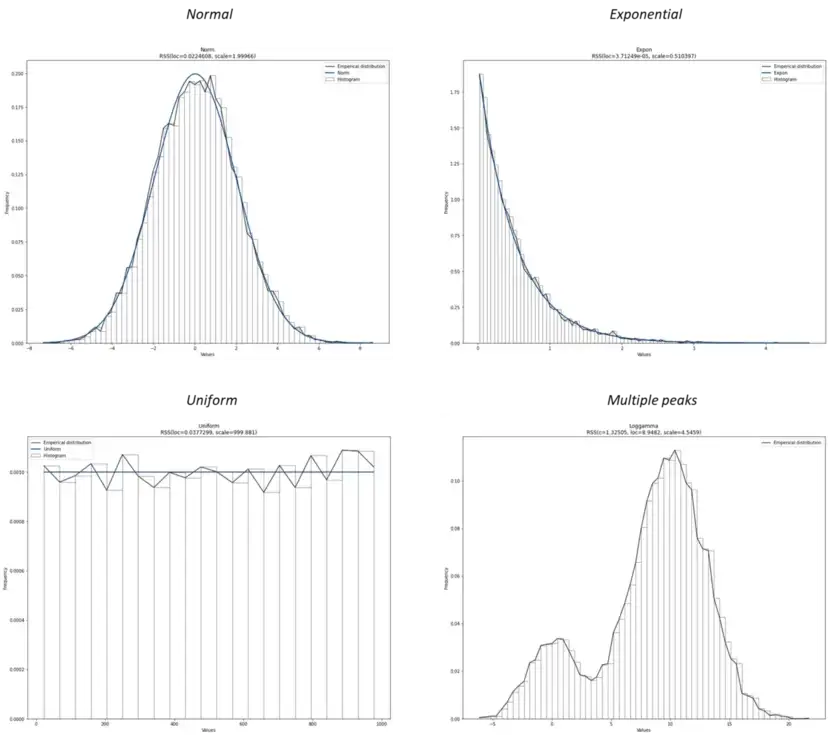

With parametric fitting, we make assumptions about the parameters of the population distribution from the input data. Or in other words, the shape of the histogram should match any of the known theoretical distributions. The advantage of the parametric fitting is that it is computationally efficient and the results are easy to interpret. The disadvantage is that it can be sensitive to outliers when having a low number of samples. 
<br> 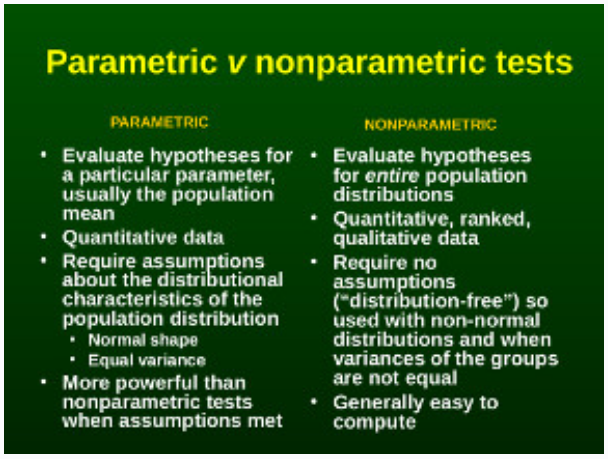

### Four steps to determine the theoretical distribution.

### The distfit library finds the best fit for your data.

In [4]:
#installing
pip install distfit

     ---------------------------------------- 7.2/7.2 MB 7.9 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
Note: you may need to restart the kernel to use updated packages.


### How to identify the best fit using parametric fitting?

In [5]:
# Import libraries
import numpy as np
from distfit import distfit

In [16]:
# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

In [17]:
# Initialize using the parametric approach.
dfit = distfit(method='parametric', todf=True)

In [18]:
# Alternatively limit the search for only a few theoretical distributions.
#dfit = distfit(method='parametric', todf=True, distr=['norm', 'expon'])

In [19]:
# Fit model on input data X.
dfit.fit_transform(X)

# Print the bet model results.
dfit.model
# 'stats': 'RSS',
# 'name': 'loggamma',
# 'params': (761.2276, -725.194369, 109.61),
# 'score': 0.0004758991728293508,
# 'loc': -725.1943699246272,
# 'scale': 109.61710960155318,
# 'arg': (761.227612981012,),
# 'CII_min_alpha': -4.542099829801259,
# 'CII_max_alpha': 8.531658573964933
# 'distr': <scipy.stats._continuous_distns.loggamma_gen>,
# 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen>,

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000220313] [loc=1.995 scale=3.999]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.103589] [loc=-12.979 scale=14.974]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.103589] [loc=-1073741836.979 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.10 sec] [RSS: 0.00133778] [loc=1.987 scale=3.452]
[distfit] >INFO> [t         ] [0.66 sec] [RSS: 0.000220318] [loc=1.995 scale=3.999]
[distfit] >INFO> [genextreme] [0.23 sec] [RSS: 0.000381196] [loc=0.524 scale=3.980]
[distfit] >INFO> [gamma     ] [0.13 sec] [RSS: 0.000217868] [loc=-579.596 scale=0.027]
[distfit] >INFO> [lognorm   ] [0.23 sec] [RSS: 0.000224828] [loc=-290.637 scale=292.602]
[distfit] >INFO> [beta      ] [0.14 sec] [RSS: 0.000194868] [loc=-33.896 scale=73.860]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0702823] [loc=-12.979 scale=28.595]
[distfit] >INFO> [loggamma  ] [0.09 sec] [RSS: 0.000229663] [loc=-931.782 scale=133.2

{'name': 'beta',
 'score': 0.00019486809808266233,
 'loc': -33.89563414475653,
 'scale': 73.8596351092942,
 'arg': (40.92690734247597, 43.29585593425082),
 'params': (40.92690734247597,
  43.29585593425082,
  -33.89563414475653,
  73.8596351092942),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1c720691820>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': -4.573111281041008,
 'CII_max_alpha': 8.59223927694299}

In [20]:
# Print the scores of the distributions:
dfit.summary[['name', 'score', 'loc', 'scale']]

,name,score,loc,scale
0,beta,0.000195,-33.895634,73.859635
1,gamma,0.000218,-579.595852,0.027494
2,norm,0.00022,1.995438,3.998795
3,t,0.00022,1.995378,3.998773
4,lognorm,0.000225,-290.63746,292.601817
5,loggamma,0.00023,-931.78182,133.236627
6,genextreme,0.000381,0.523762,3.97994
7,dweibull,0.001338,1.987325,3.451904
8,uniform,0.070282,-12.978835,28.594866
9,pareto,0.103589,-1073741836.978835,1073741824.0


[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Beta'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

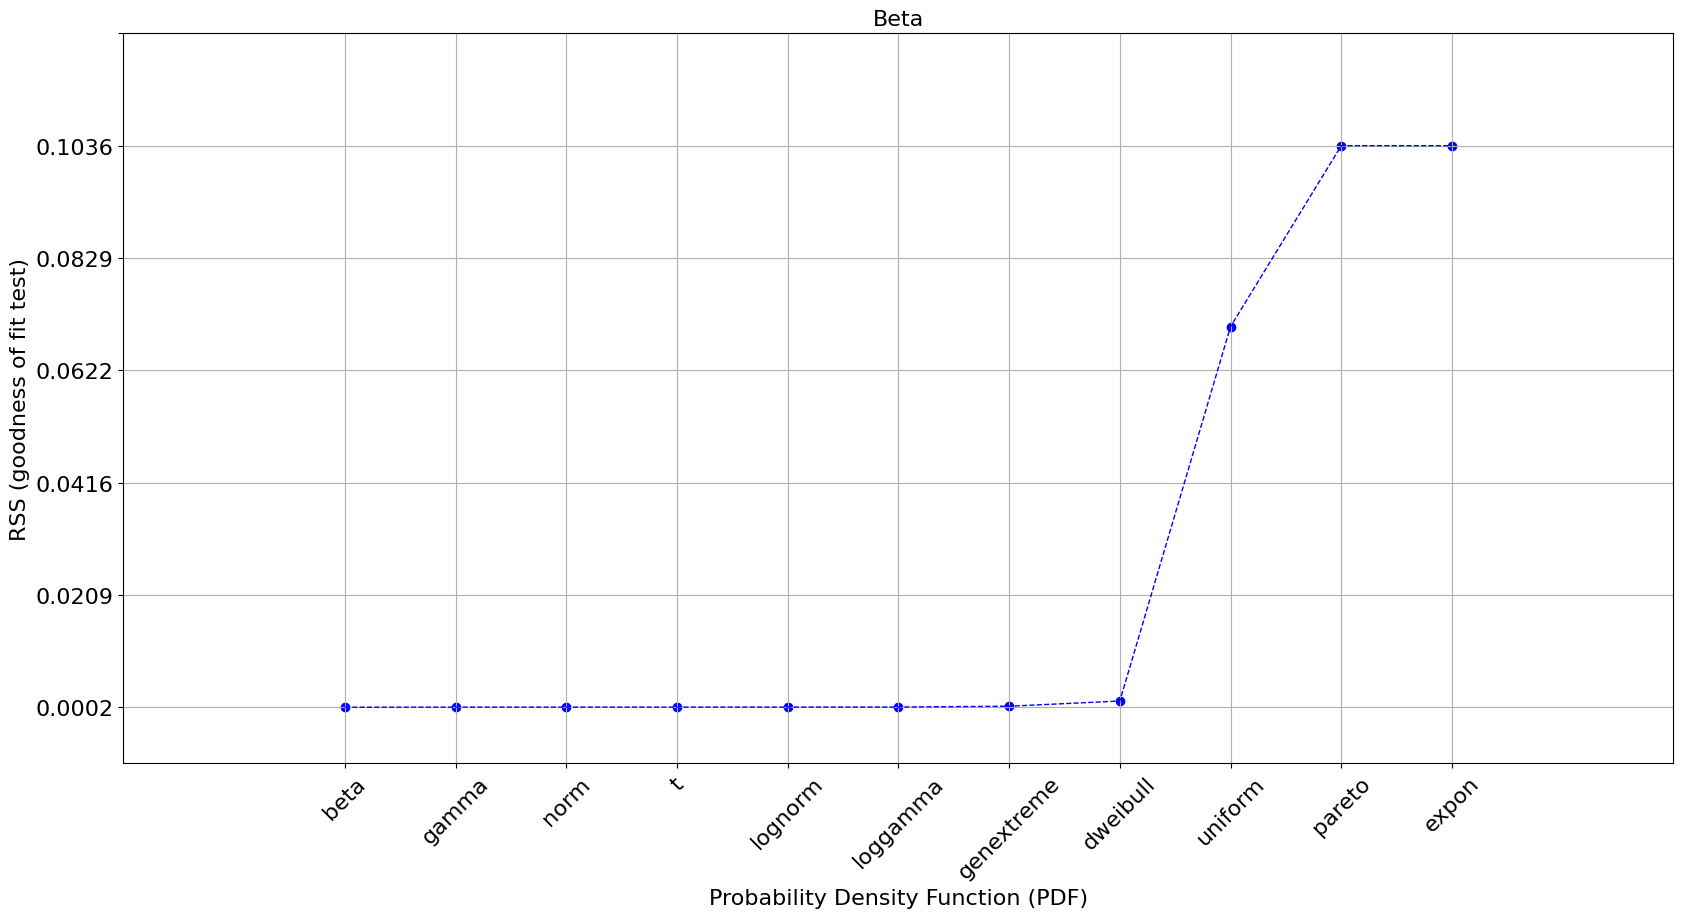

In [21]:
# Plot the RSS of the fitted distributions.
dfit.plot_summary()

### Bootstrapping for more confidence.

[distfit] >INFO> Bootstrap for 11 distributions with n_boots=100
[distfit] >INFO> Bootstrap: [beta      ] > Score: 0.64 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [gamma     ] > Score: 0.4 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [norm      ] > Score: 0.35 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [t         ] > Score: 0.29 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [lognorm   ] > Score: 0.19 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [loggamma  ] > Score: 0.11 > Pass 95% CII KS-test: True 
[distfit] >INFO> Bootstrap: [genextreme] > Score: 0 > Pass 95% CII KS-test: False     
[distfit] >INFO> Bootstrap: [dweibull  ] > Score: 0.01 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [uniform   ] > Score: 0 > Pass 95% CII KS-test: False  
[distfit] >INFO> Bootstrap: [pareto    ] > Score: 0 > Pass 95% CII KS-test: False 
[distfit] >INFO> Bootstrap: [expon     ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] 

          name     score  bootstrap_score bootstrap_pass
0         beta  0.000195             0.64           True
1        gamma  0.000218             0.40           True
2         norm   0.00022             0.35           True
3            t   0.00022             0.29           True
4      lognorm  0.000225             0.19           True
5     loggamma   0.00023             0.11           True
6     dweibull  0.001338             0.01          False
7   genextreme  0.000381             0.00          False
8      uniform  0.070282             0.00          False
9       pareto  0.103589             0.00          False
10       expon  0.103589             0.00          False


(<Figure size 2000x1000 with 2 Axes>,
 <AxesSubplot: title={'center': 'Beta'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

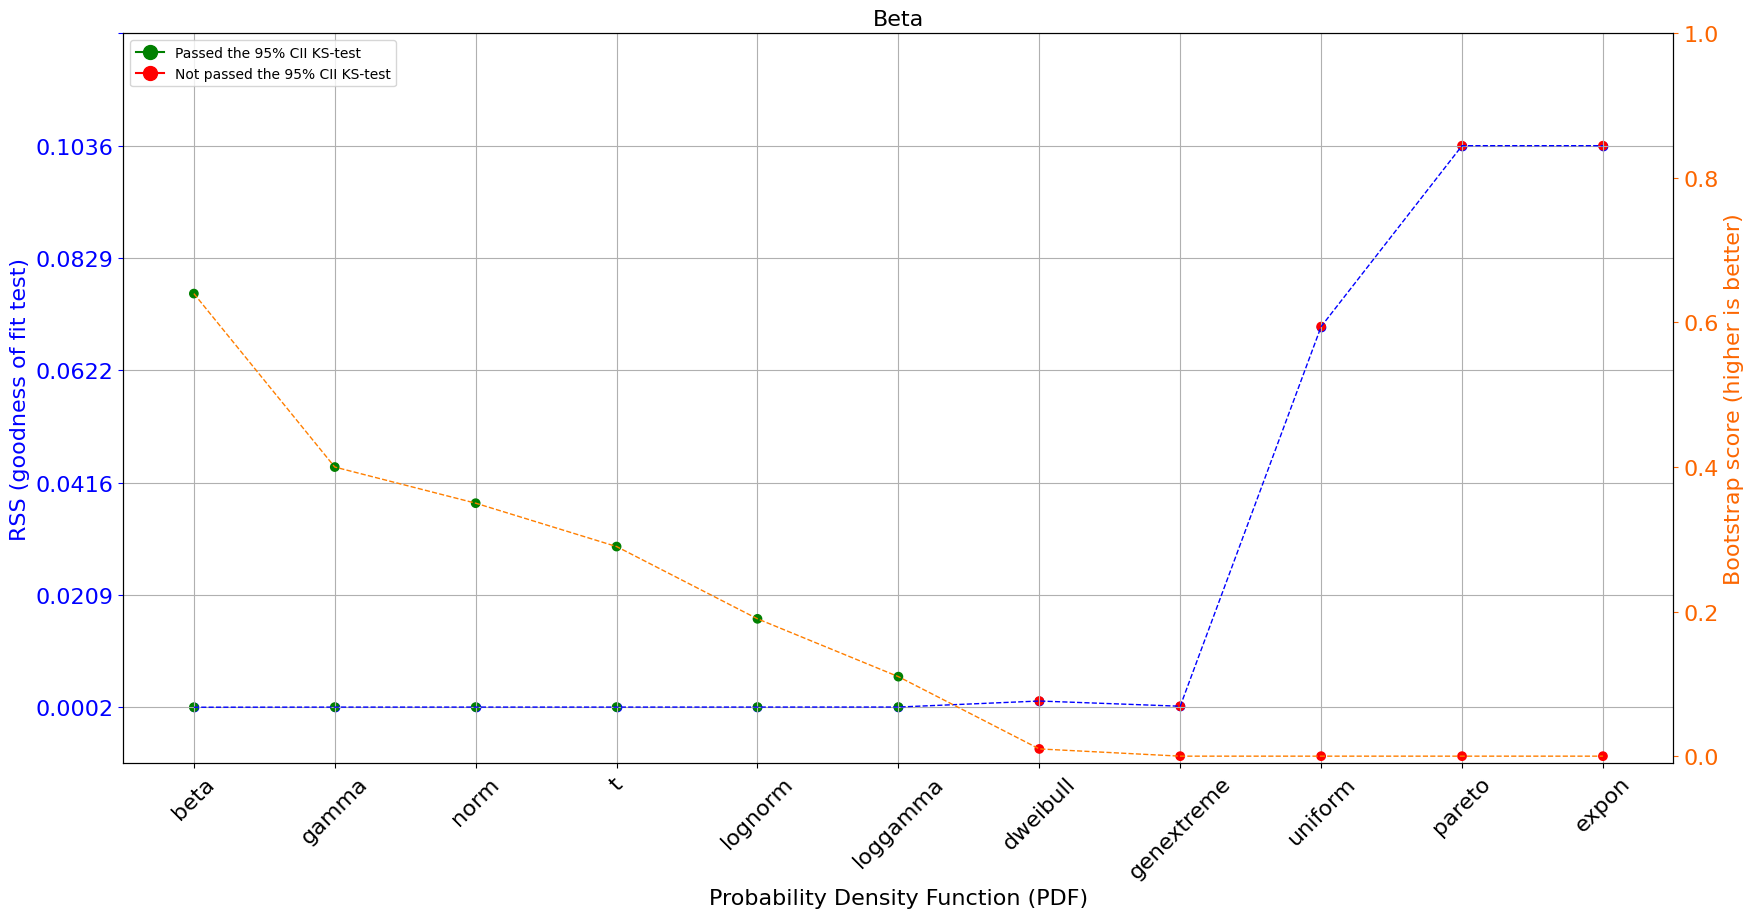

In [23]:
# Set bootstrapping during initialization.
# dfit = distfit(method='parametric', n_boots=100)

# Bootstrapping
dfit.bootstrap(X,n_boots=100)

# Print
print(dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']])

#           name     score  bootstrap_score bootstrap_pass
# 0     loggamma  0.000218             0.42           True
# 1         beta  0.000217             0.36           True
# 2            t  0.000248             0.08           True
# 3         norm  0.000247             0.07           True
# 4      lognorm  0.000311             0.04          False
# 5        gamma   0.00029             0.01          False
# 6   genextreme  0.000874             0.00          False
# 7     dweibull  0.001651             0.00          False
# 8      uniform  0.073118             0.00          False
# 9        expon  0.104076             0.00          False
# 10      pareto  0.104076             0.00          False

# Plot the RSS and bootstrap scores of the fitted distributions.
dfit.plot_summary()

### Plots guide towards a better decision.

In [26]:
import matplotlib.pyplot as plt

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:-33.895634, scale:73.859635)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:-33.895634, scale:73.859635)


(<Figure size 2000x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '\nbeta(a=40.9269, b=43.2959, loc=-33.8956, scale=73.8596)'}, xlabel='Values', ylabel='Frequency'>)

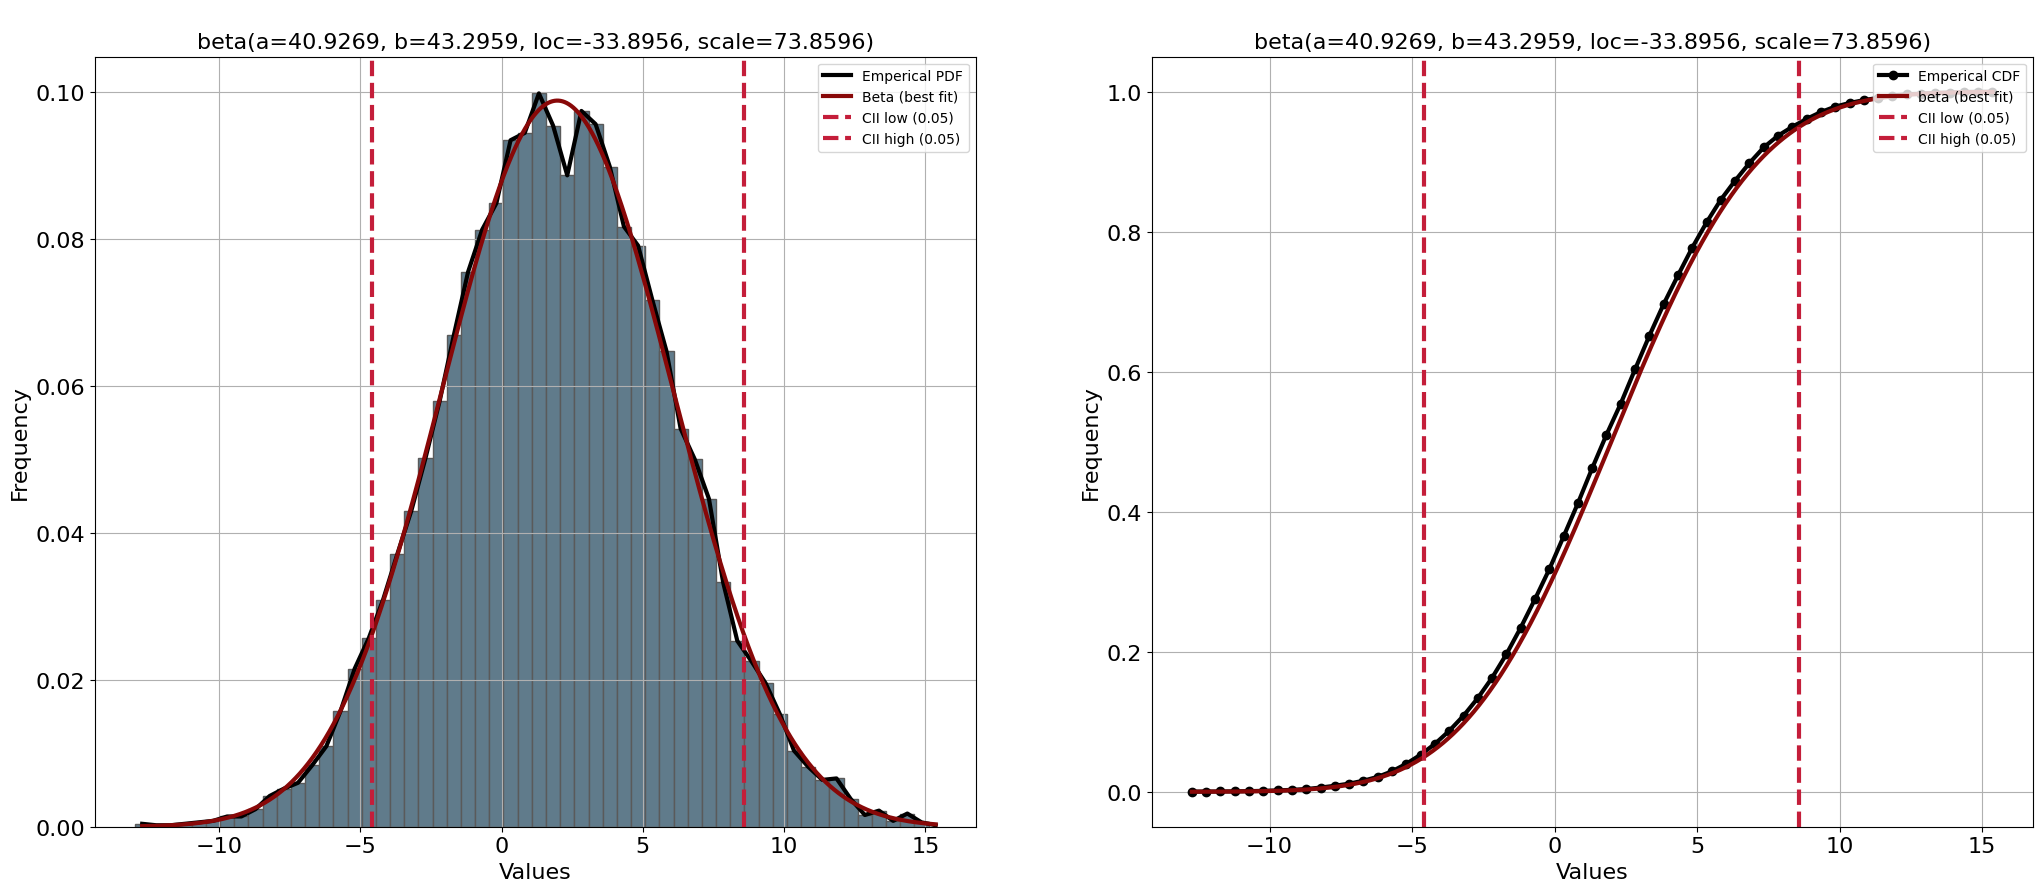

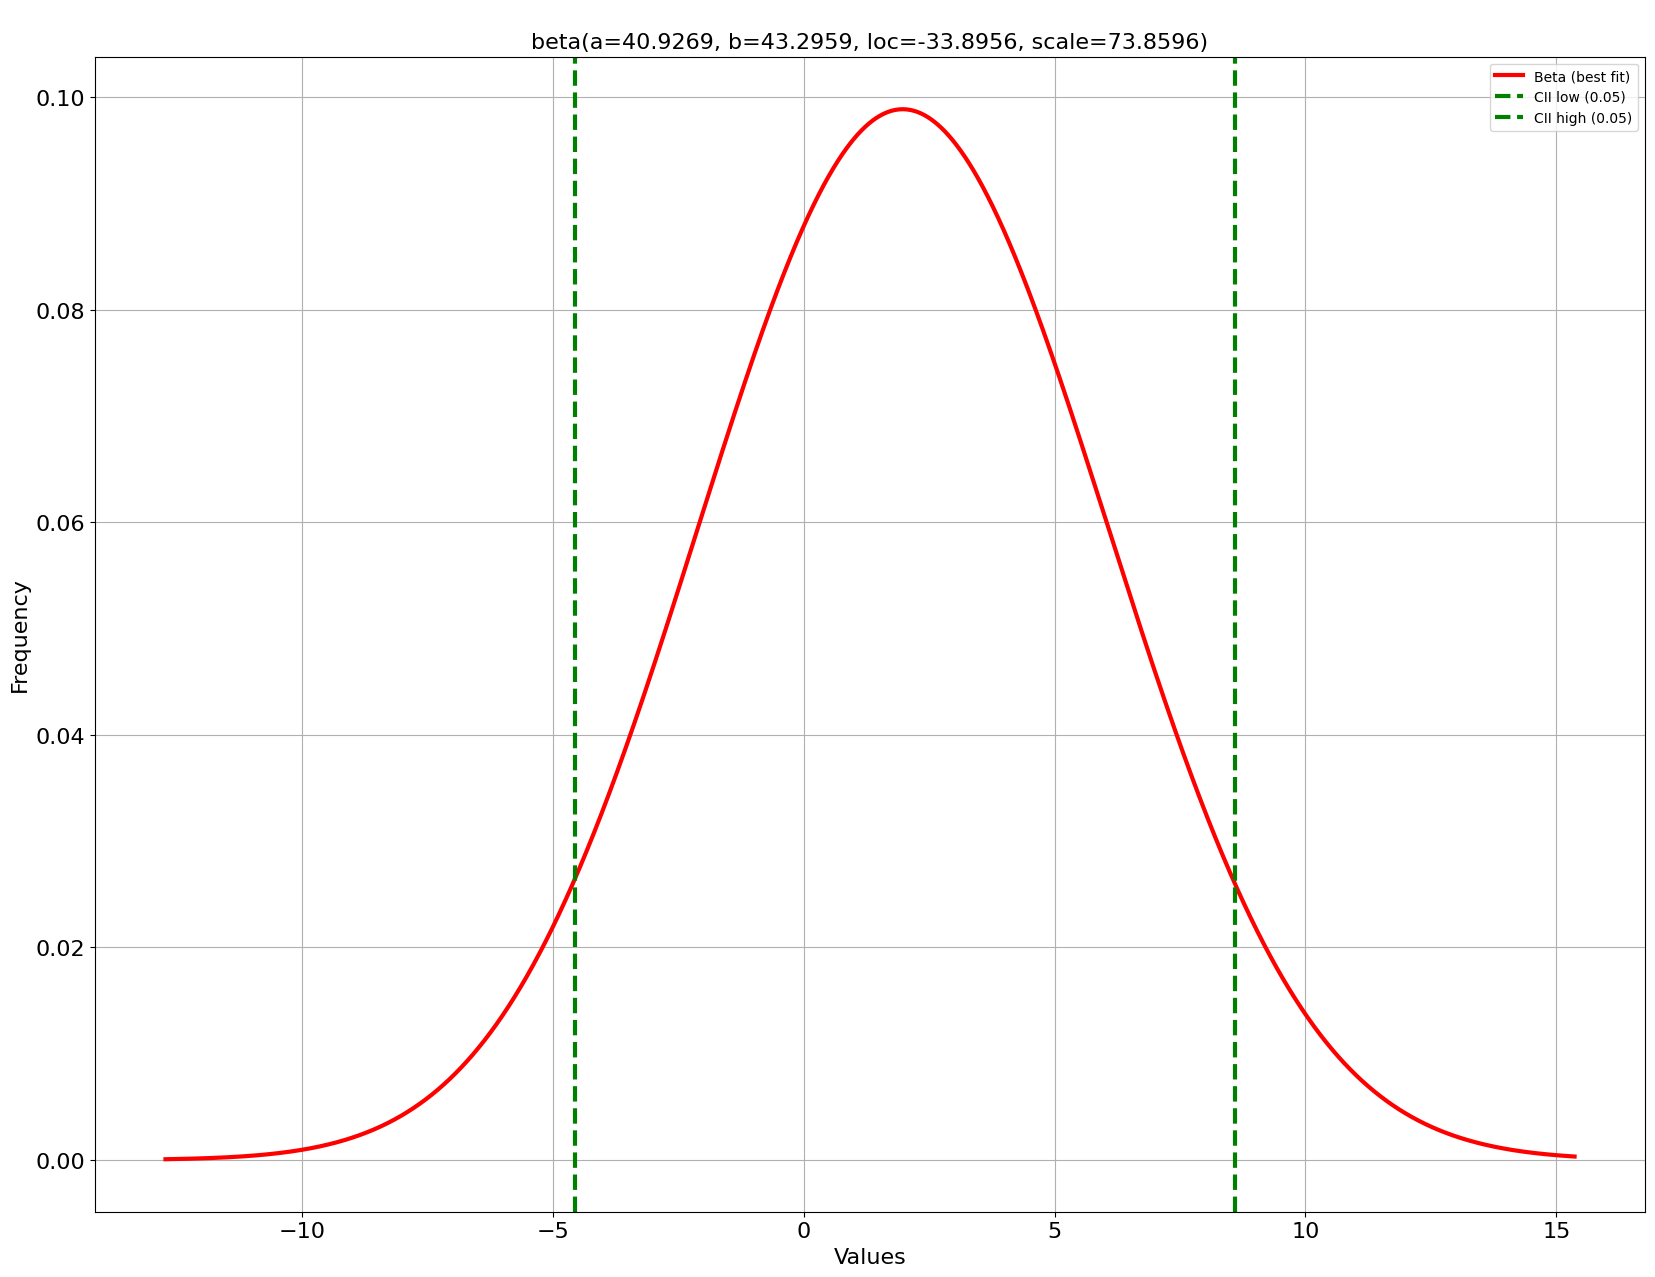

In [27]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', ax=ax[1])

# Change or remove properties of the chart.
dfit.plot(chart='PDF', 
          emp_properties=None,
          bar_properties=None,
          pdf_properties={'color': 'r'},
          cii_properties={'color': 'g'})

### Quantile-Quantile plot.

(None,
 <AxesSubplot: title={'center': 'QQ-plot\nbeta(a=40.9269, b=43.2959, loc=-33.8956, scale=73.8596)'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>)

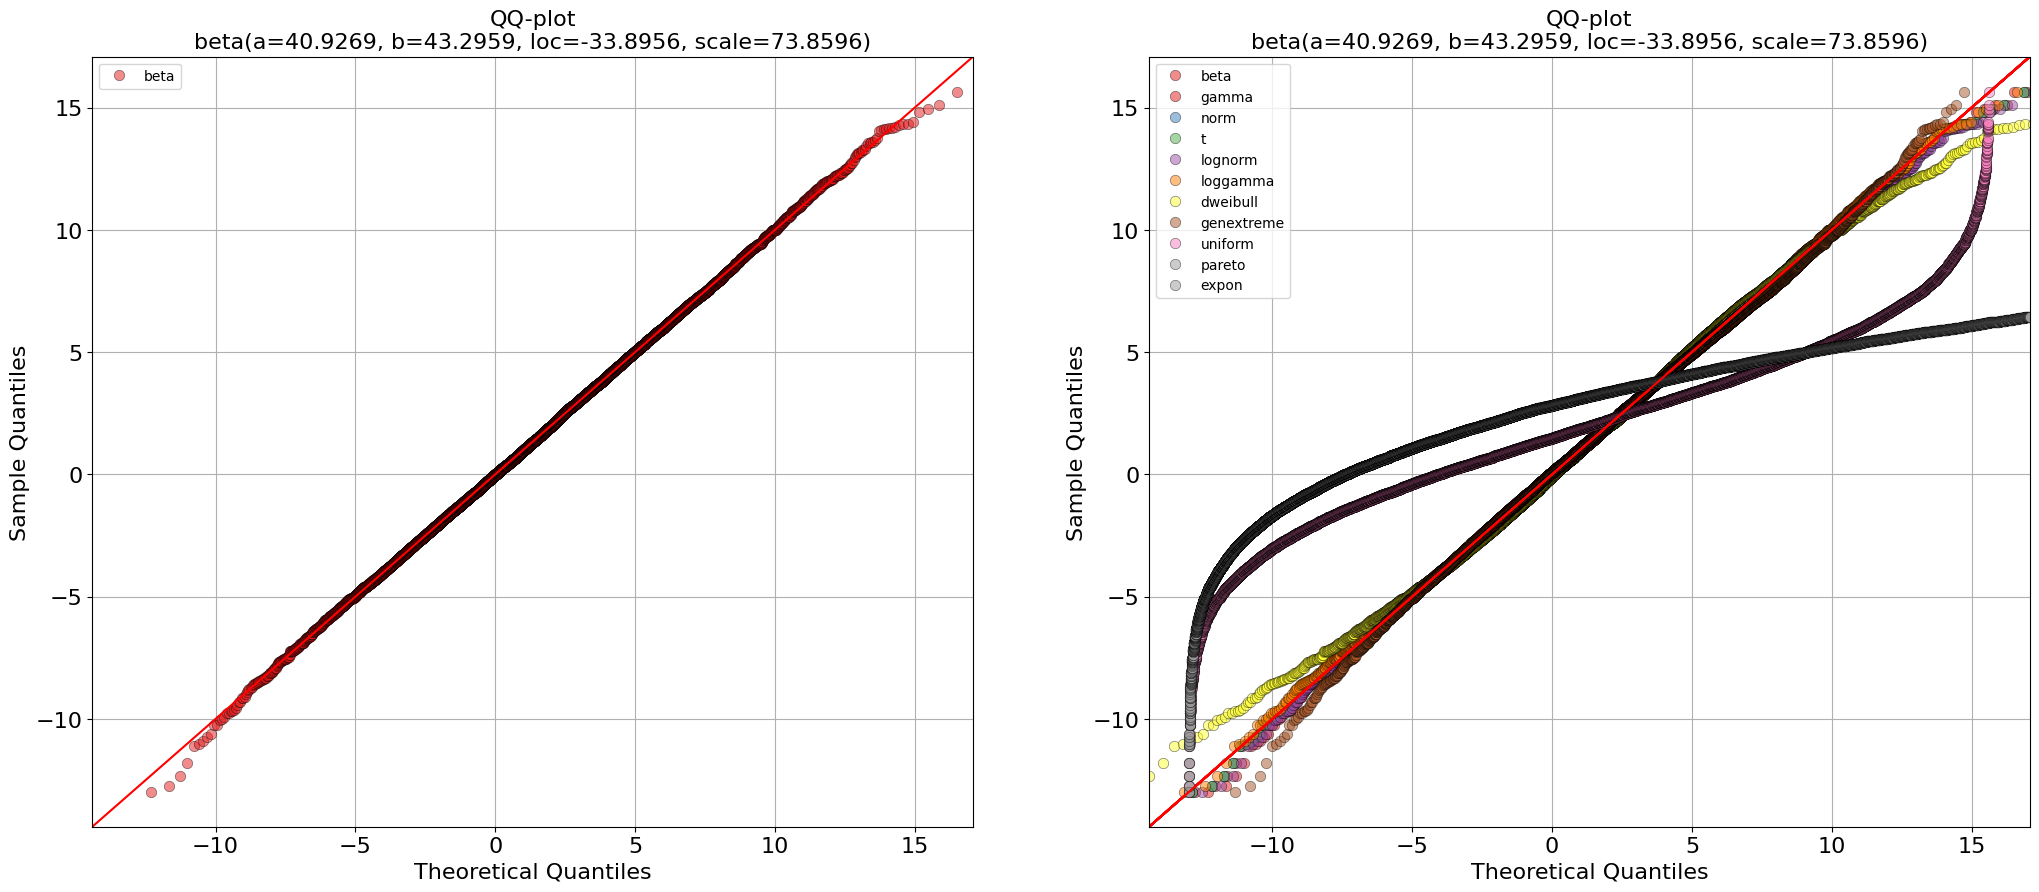

In [28]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot left panel with best fitting distribution.
dfit.qqplot(X, ax=ax[0])
# plot right panel with all fitted theoretical distributions
dfit.qqplot(X, n_top=11, ax=ax[1])

### Identify the best distribution fit using non-parametric fitting.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Compute confidence intervals [percentile]
[distfit] >INFO> Create PDF plot for the percentile method.


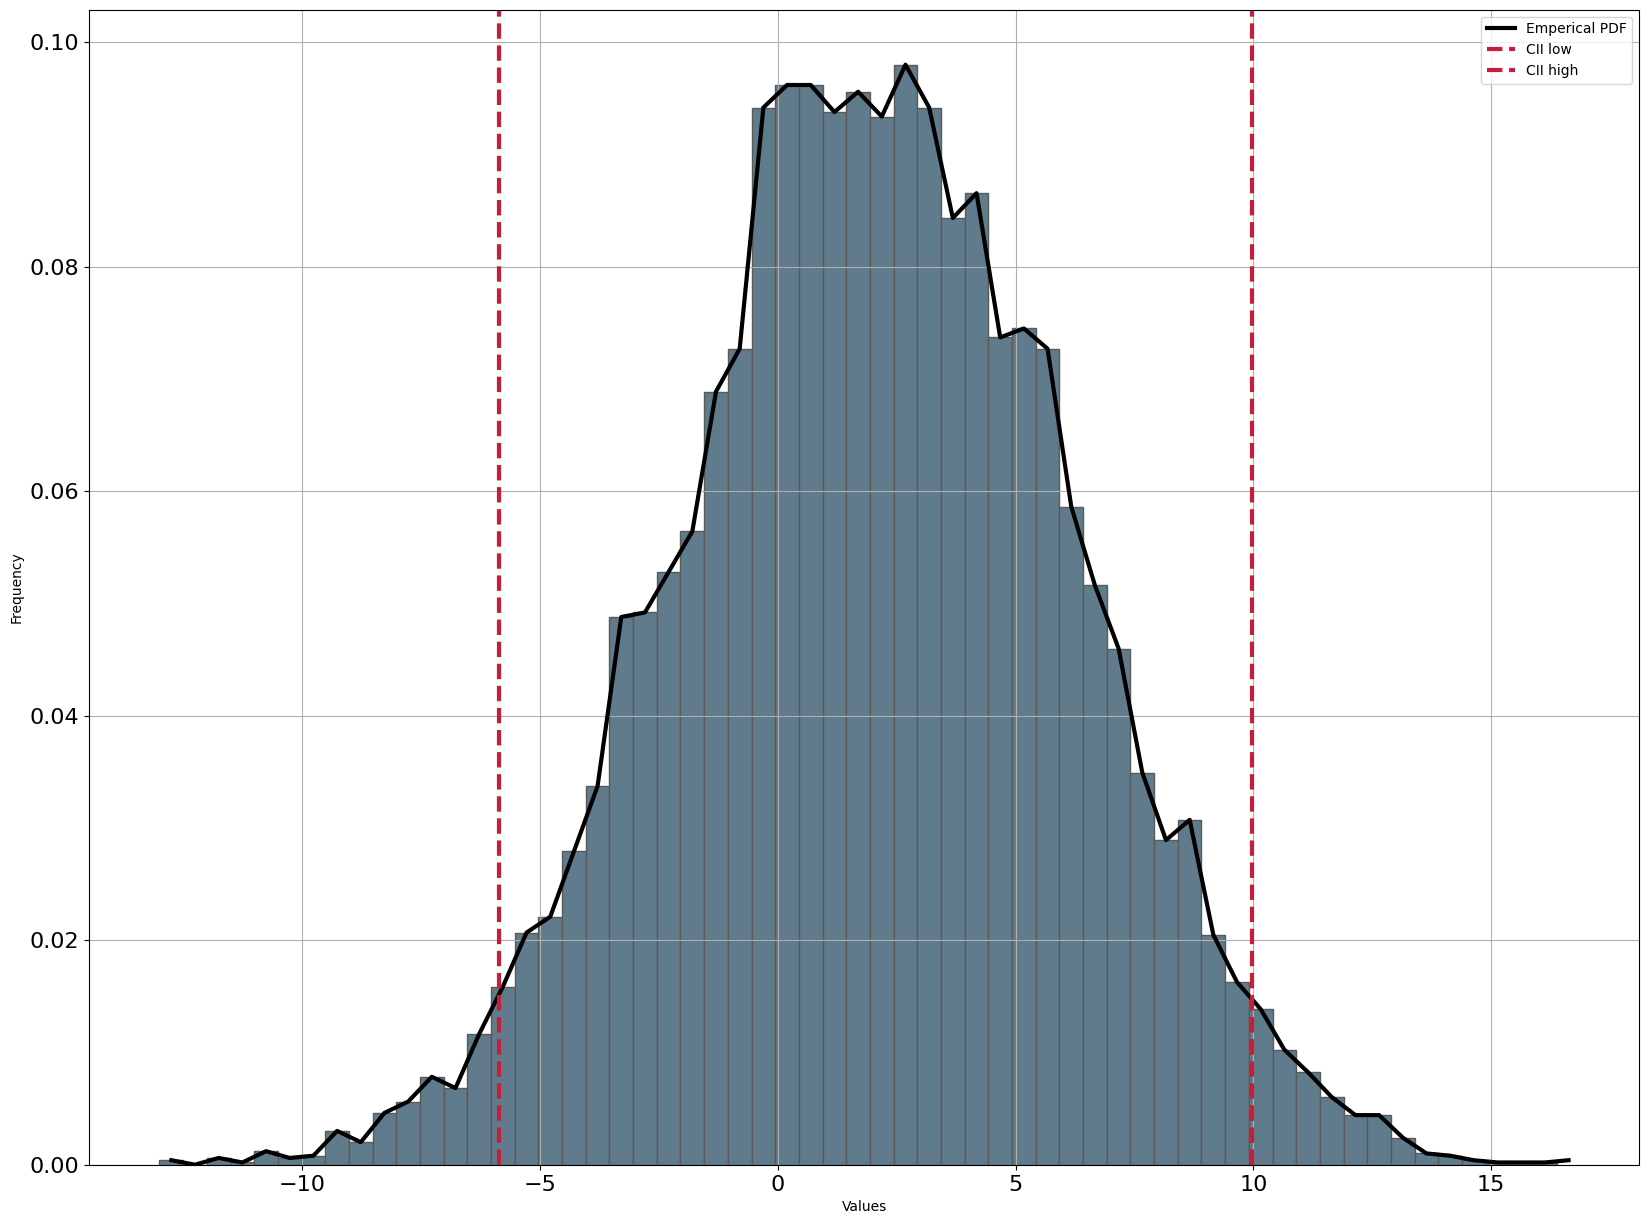

In [29]:
# Load library
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the quantile or percentile approach.
dfit = distfit(method='quantile')
dfit= distfit(method='percentile')

# Fit model on input data X and detect the best theoretical distribution.
dfit.fit_transform(X)
# Plot the results
fig, ax = dfit.plot()

### Identify the best distribution for discrete data.

In [30]:
# Load library
from scipy.stats import binom
from distfit import distfit

# Parameters for the test-case:
n = 8
p = 0.5
# Generate 10000 randon discrete data points of the distribution of (n, p)
X = binom(n, p).rvs(10000)
# Initialize using the discrete approach.
dfit = distfit(method='discrete')
# Find the best fit.
dfit.fit_transform(X)

# print results
print(dfit.model)
# 'name': 'binom',
# 'score': 0.00010939074999009602,
# 'chi2r': 1.5627249998585145e-05,
# 'n': 8,
# 'p': 0.501366,
# 'CII_min_alpha': 2.0,
# 'CII_max_alpha': 6.0}
# 'distr': <scipy.stats._discrete_distns.binom_gen at 0x14350be2230>,
# 'model': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x14397a2b640>,

# Make predictions
results = dfit.predict([0, 2, 8])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=3.67e-05] [n=8] [p=0.500445] [chi^2=5.24e-06]
[distfit] >INFO> Compute confidence intervals [discrete]
[distfit] >INFO> Compute significance for 3 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


{'name': 'binom', 'model': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C72571C850>, 'params': (8, 0.5004449066638447), 'score': 3.667822266505819e-05, 'chi2r': 5.239746095008313e-06, 'n': 8, 'p': 0.5004449066638447, 'CII_min_alpha': 2.0, 'CII_max_alpha': 6.0}


[distfit] >INFO> Create PDF plot for the discrete method.
[distfit] >INFO> Create PDF plot for the discrete method.
[distfit] >INFO> Create PDF plot for the discrete method.
[distfit] >INFO> Create PDF plot for the discrete method.
[distfit] >INFO> Create PDF plot for the discrete method.


(<Figure size 2000x1500 with 2 Axes>,
 array([<AxesSubplot: title={'center': '\nBinom\nn=8, p=0.500445'}, xlabel='Values', ylabel='Frequency'>,
        <AxesSubplot: xlabel='n', ylabel='RSS'>], dtype=object))

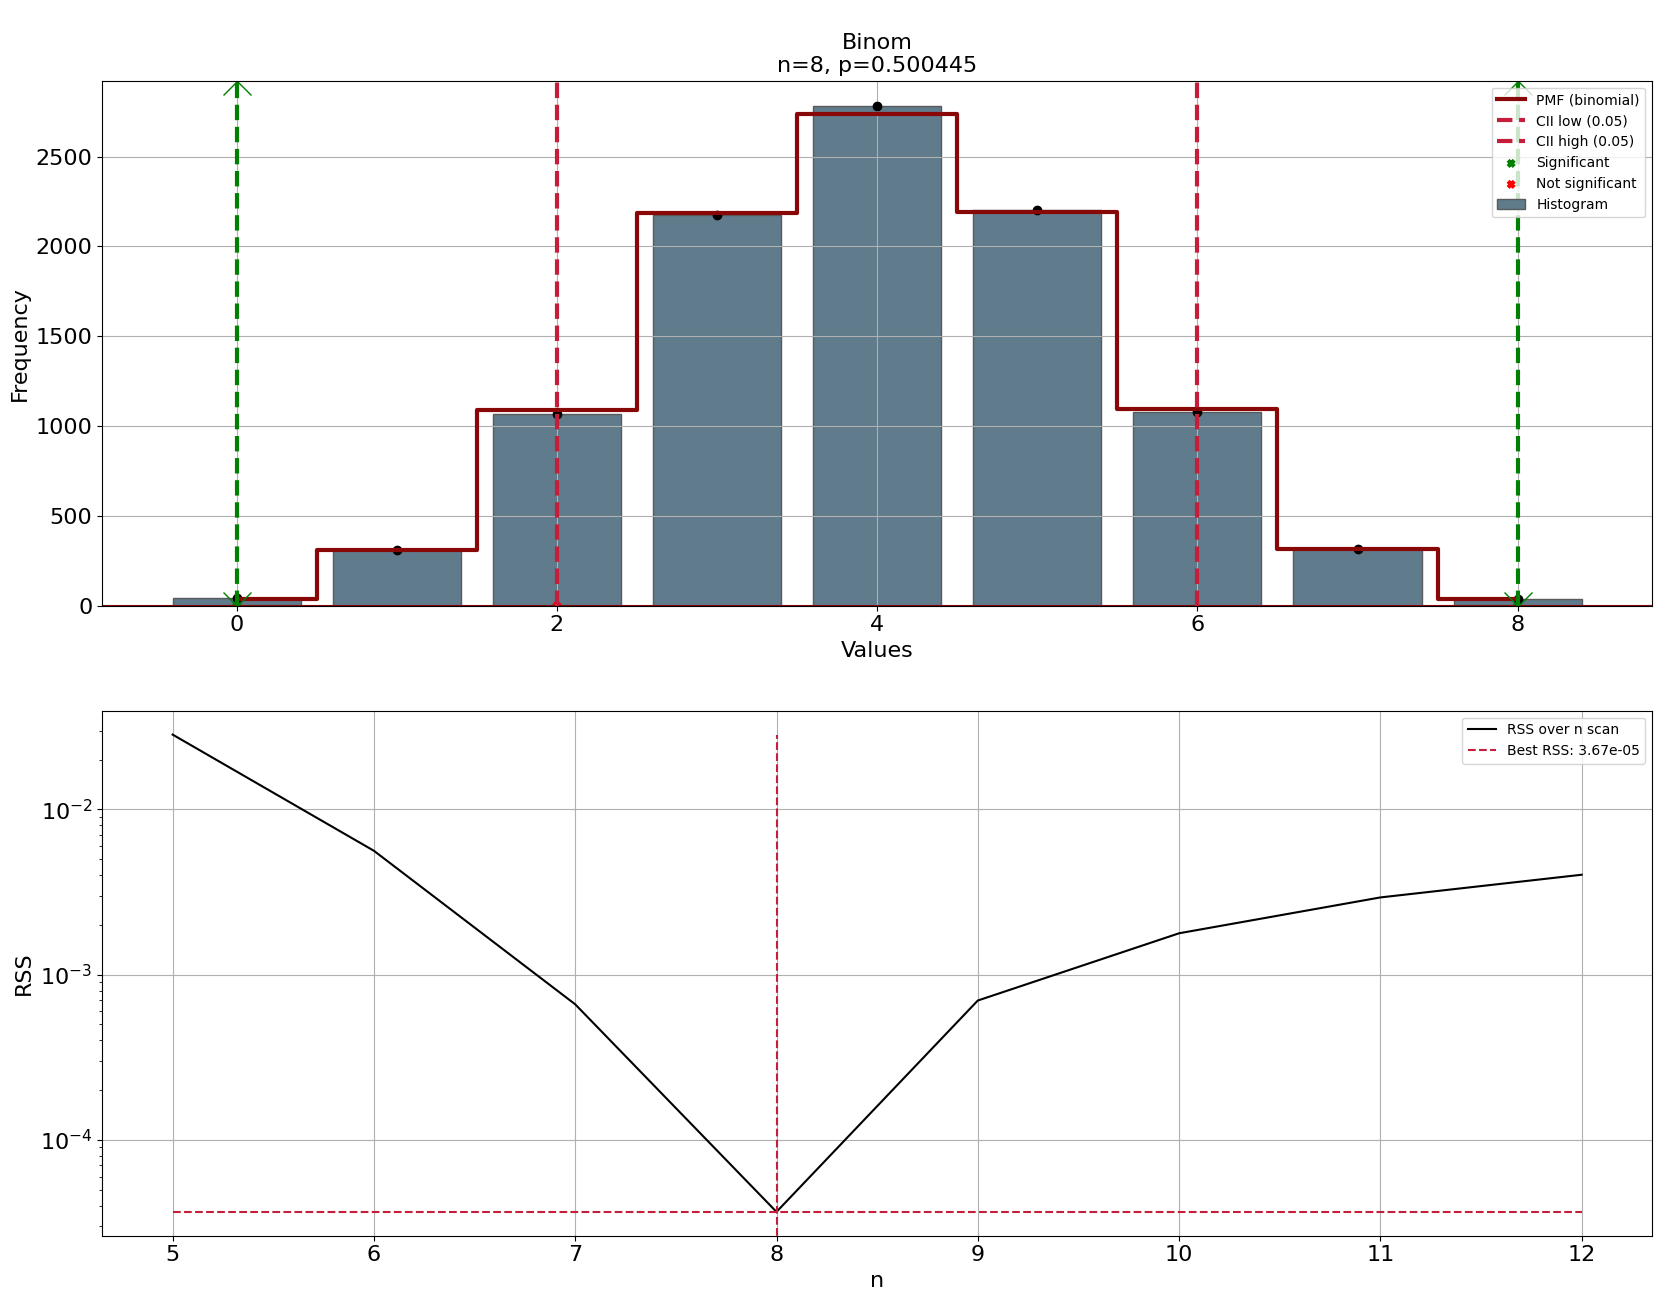

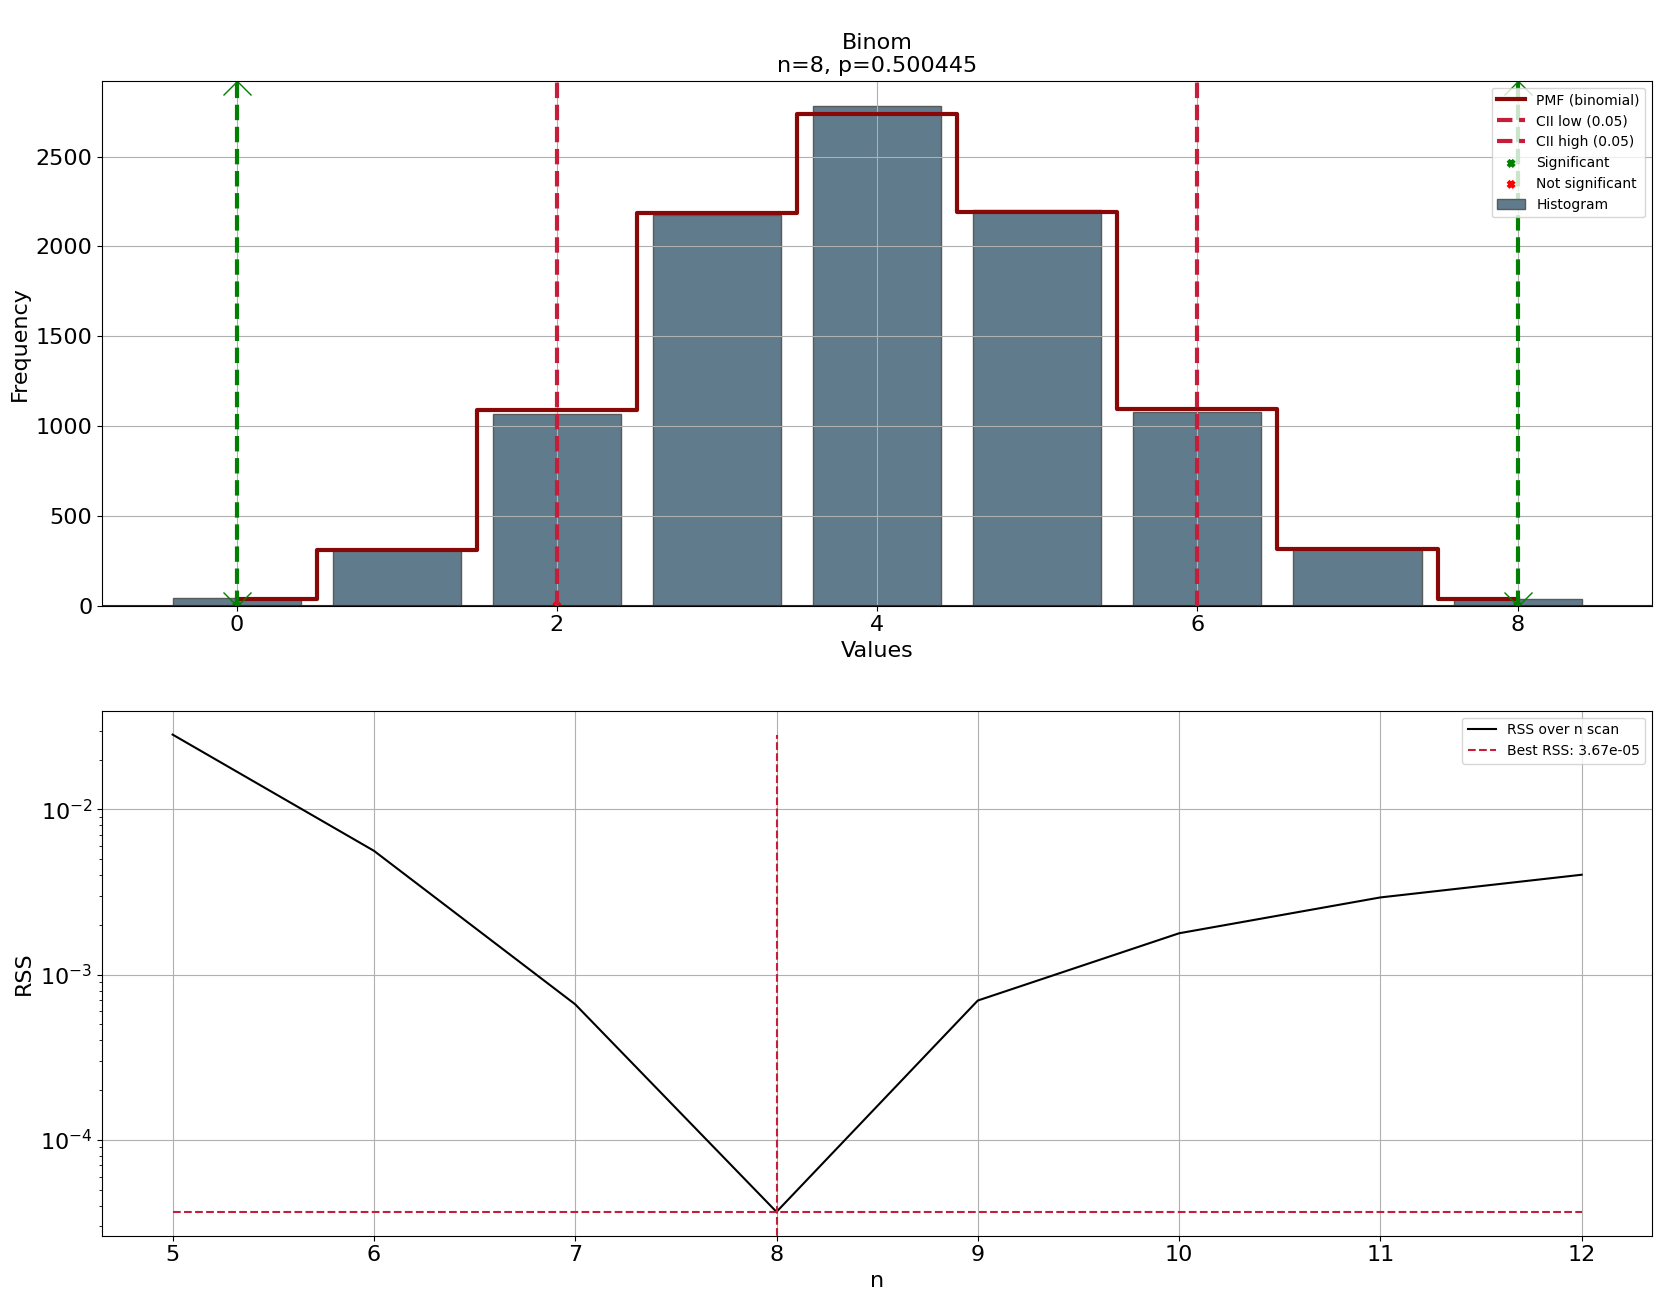

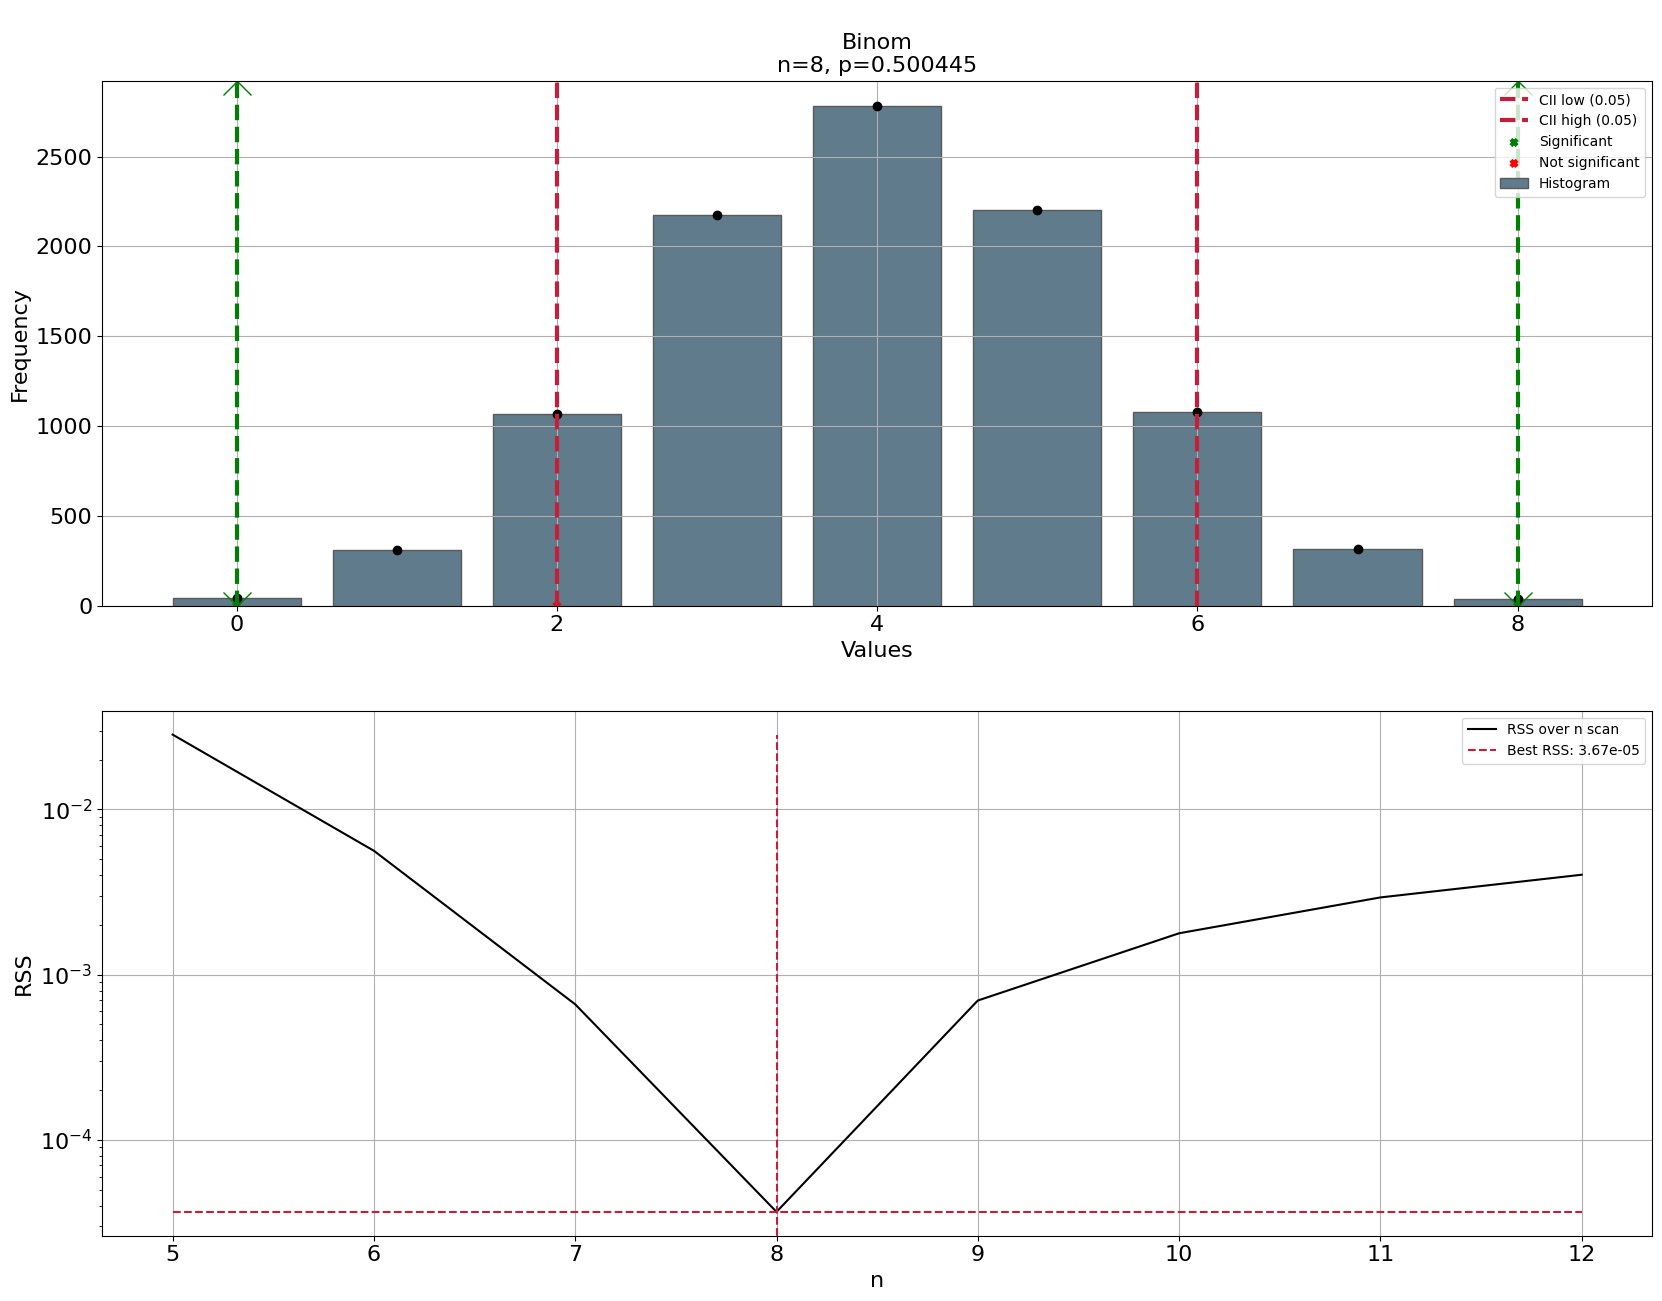

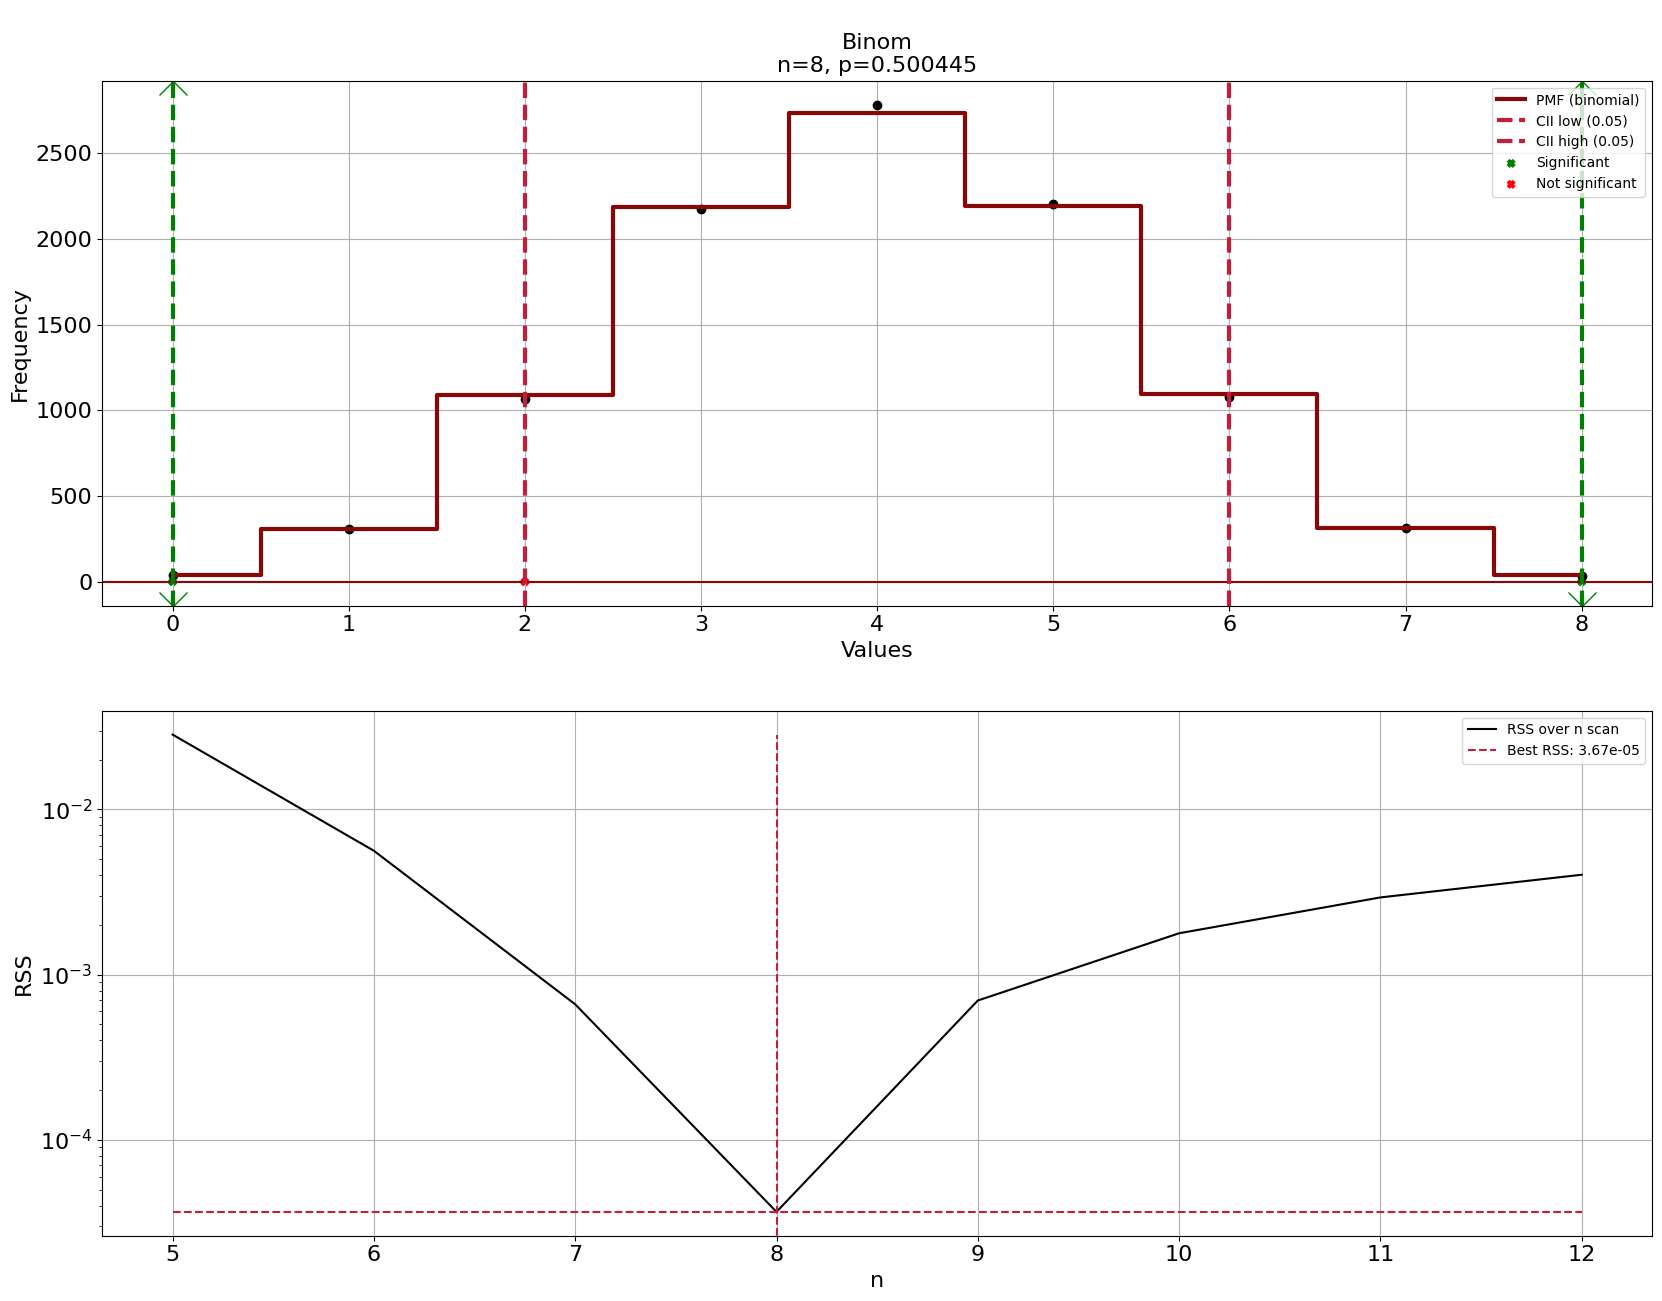

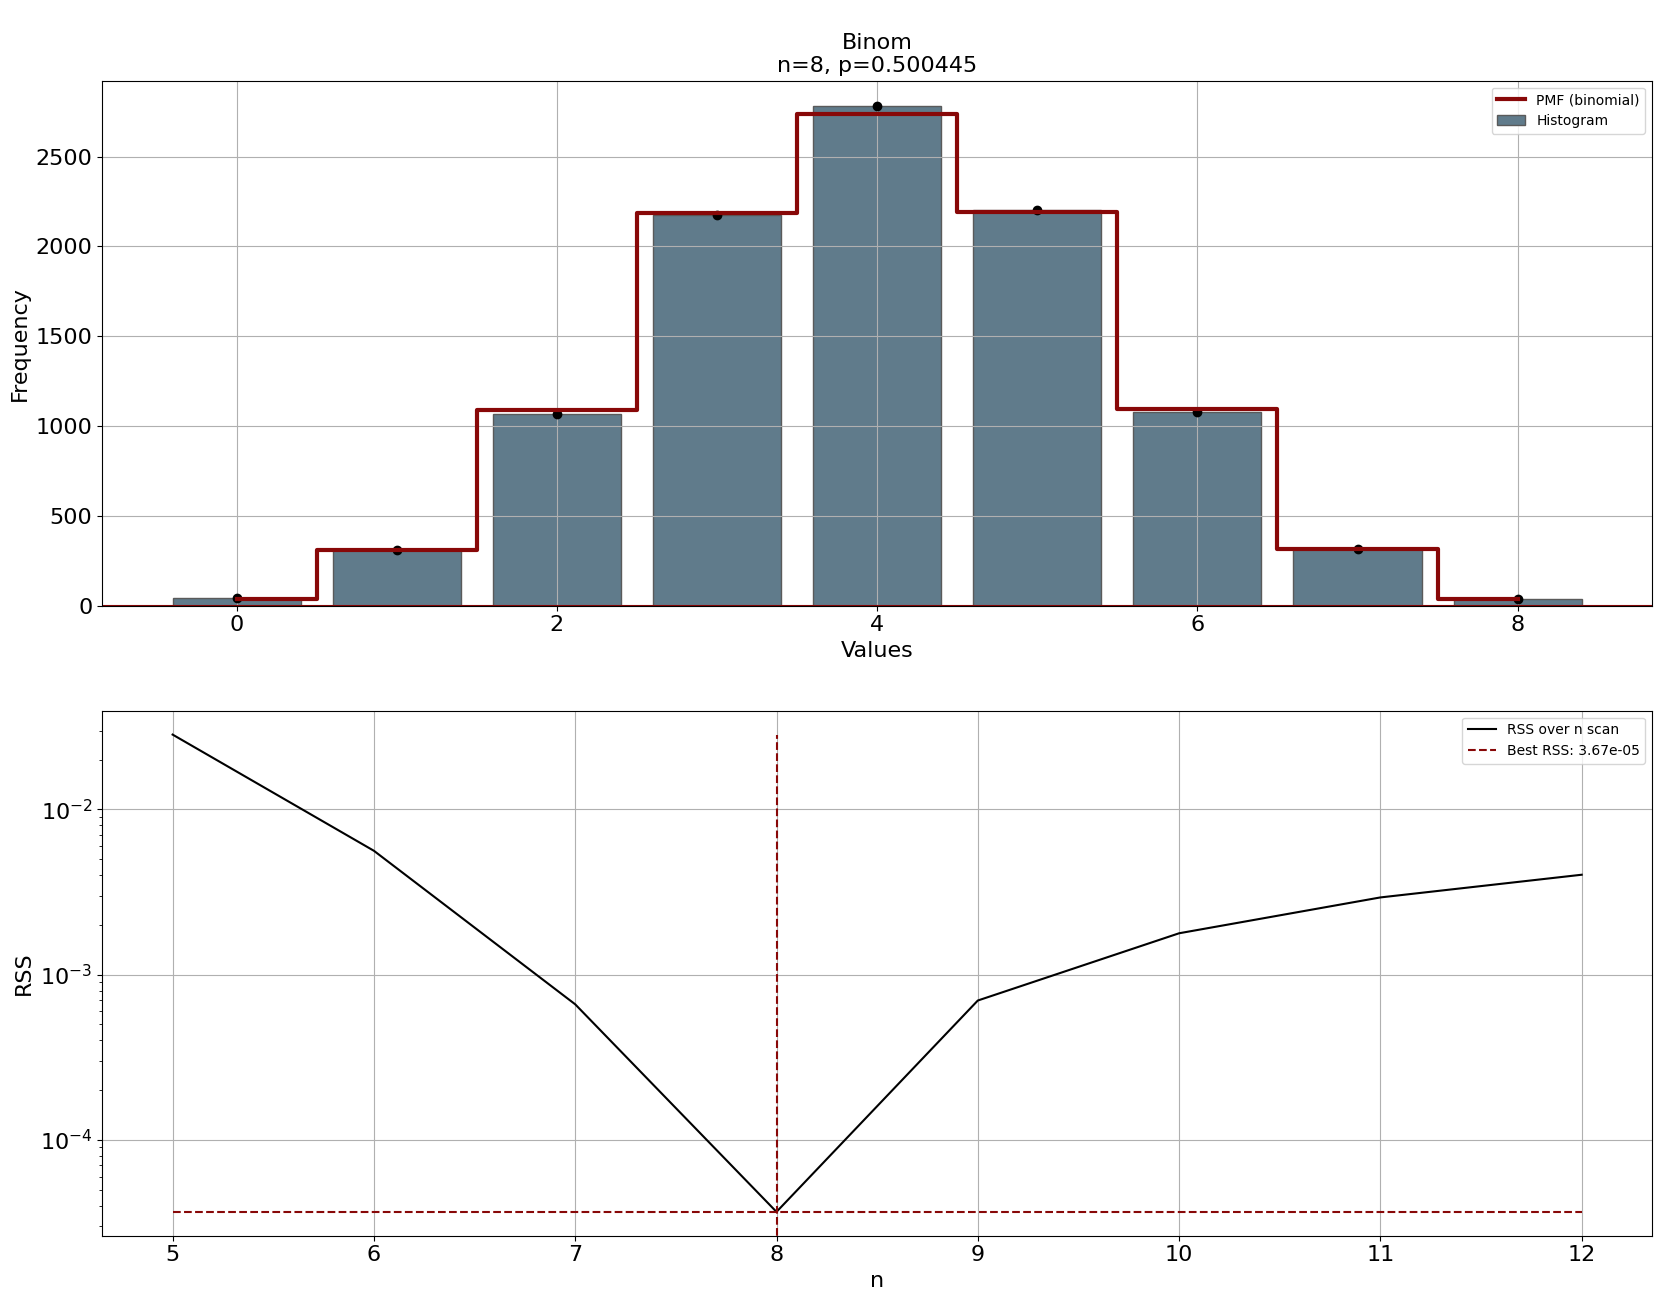

In [34]:
# Plot the results
dfit.plot()

# Change colors or remove parts of the figure.
# Remove emperical distribution
dfit.plot(emp_properties=None)
# Remove PDF
dfit.plot(pdf_properties=None)
# Remove histograms
dfit.plot(bar_properties=None)
#Remove confidence intervals
dfit.plot(cii_properties=None)

### Applications of distribution fitting.

[distfit] >WARNING> multtest will be removed from initialization in a future release. Please set this parameter when using the predict function. Example: dfit.predict(multtest="holm")
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000452183] [loc=1.928 scale=4.013]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.102025] [loc=-11.967 scale=13.895]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.102025] [loc=-2147483659.967 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [0.10 sec] [RSS: 0.00201882] [loc=2.036 scale=3.411]
[distfit] >INFO> [t         ] [0.66 sec] [RSS: 0.000452189] [loc=1.928 scale=4.013]
[distfit] >INFO> [genextreme] [0.27 sec] [RSS: 0.00123242] [loc=0.361 scale=3.965]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 0.000450899] [loc=-1804.535 scale=0.009]
[distfit] >INFO> [lognorm   ] [0.25 sec] [RSS: 0.000460899] [loc=-198.209 scale=200.096]
[distfit] >INFO> [beta      ] [0.18 sec] [RSS: 0.000459995] [loc=-47.604 

      y   y_proba y_pred         P
0  -8.0  0.019826   down  0.006609
1  -2.0  0.327685   none  0.163842
2   1.0  0.408850   none  0.408850
3   3.0  0.408850   none  0.394391
4   5.0  0.332792   none  0.221861
5  15.0  0.003455     up  0.000576


(<Figure size 2000x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '\ngamma(a=202661, loc=-1804.54, scale=0.0089137)'}, xlabel='Values', ylabel='Frequency'>)

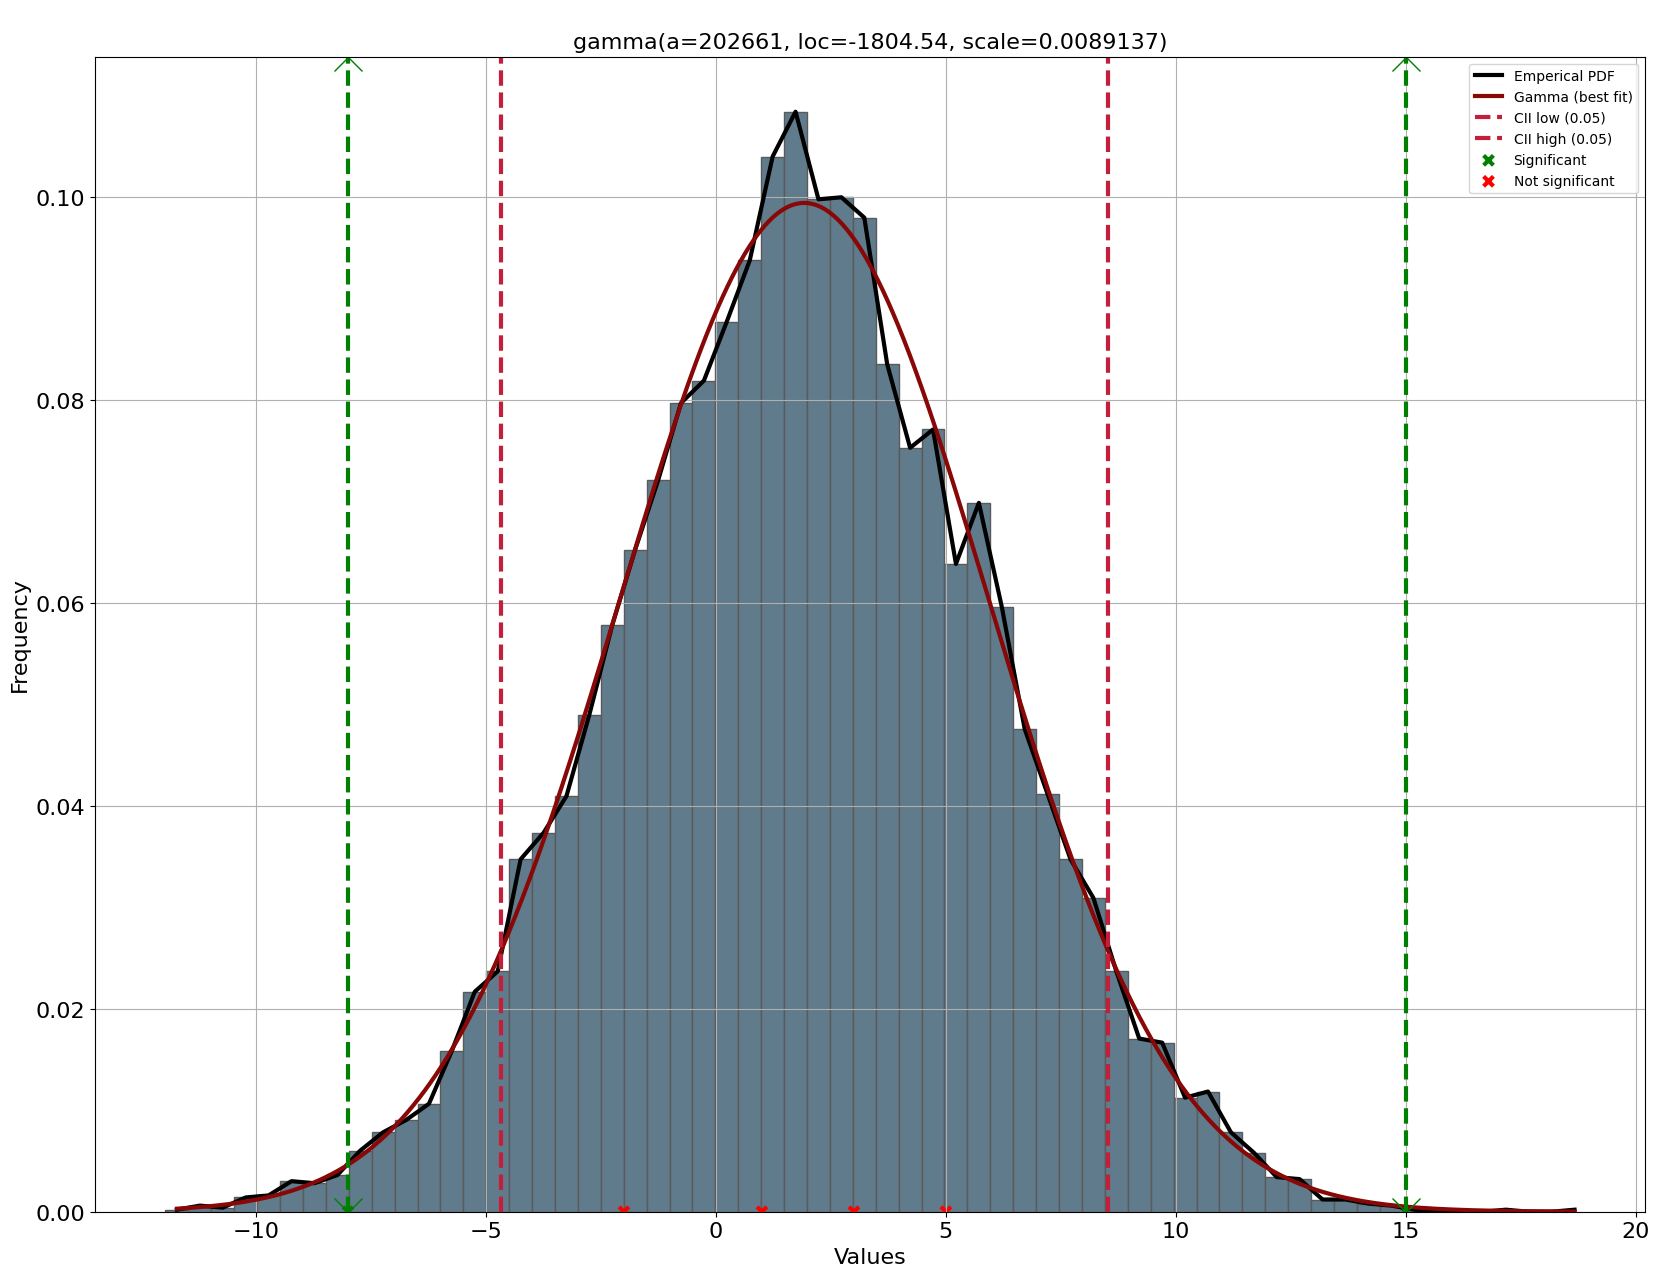

In [35]:
# Import libraries
import numpy as np
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the parametric approach (default).
dfit = distfit(multtest='fdr_bh', alpha=0.05)

# Fit model on input data X.
dfit.fit_transform(X)
# With the fitted model we can make predictions on new unseen data.
y = [-8, -2, 1, 3, 5, 15]
dfit.predict(y, todf=True)

# Print results
print(dfit.results['df'])
#      y   y_proba y_pred         P
# 0  -8.0  0.017455   down  0.005818
# 1  -2.0  0.312256   none  0.156128
# 2   1.0  0.402486   none  0.399081
# 3   3.0  0.402486   none  0.402486
# 4   5.0  0.340335   none  0.226890
# 5  15.0  0.003417     up  0.000569

# Plot the results
dfit.plot()

In [36]:
# Import libraries
import numpy as np
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the parametric approach (default).
dfit = distfit()

# Fit model on input data X.
dfit.fit_transform(X)

# The fitted distribution can now be used to generate new samples.
X_synthetic = dfit.generate(n=1000)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000491436] [loc=2.007 scale=4.015]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.104578] [loc=-12.487 scale=14.494]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.104578] [loc=-2147483660.487 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.00175147] [loc=1.950 scale=3.440]
[distfit] >INFO> [t         ] [0.66 sec] [RSS: 0.000491442] [loc=2.007 scale=4.015]
[distfit] >INFO> [genextreme] [0.41 sec] [RSS: 0.00137633] [loc=0.460 scale=3.977]
[distfit] >INFO> [gamma     ] [0.09 sec] [RSS: 0.000495133] [loc=-1609.044 scale=0.010]
[distfit] >INFO> [lognorm   ] [0.25 sec] [RSS: 0.000535752] [loc=-285.809 scale=287.784]
[distfit] >INFO> [beta      ] [0.12 sec] [RSS: 0.000496362] [loc=-96.296 scale=203.395]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0766101] [loc=-12.487 scale=30.678]
[distfit] >INFO> [loggamma  ] [0.09 sec] [RSS: 0.000475472] [loc=-719.309 scale=109.